# Аналитика популярного сервиса аренды самокатов GoFast

Проанализируем данные и проверим некоторые гипотезы, которые могут помочь сервису аренды самокатов GoFast вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:
     - абонентская плата отсутствует;
     - стоимость одной минуты поездки — 8 рублей;
     - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
     - абонентская плата — 199 рублей в месяц;
     - стоимость одной минуты поездки — 6 рублей;
     - стоимость старта — бесплатно.

**Цель исследования** — проверим три гипотезы:
1. Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

*Дополнительно* проверим 2 распределения:
1. Выяснить, какое минимальное количество промокодов на месяц бесплатной подписки нужно разослать, чтобы вероятность не выполнить план (100 продлений подписки) была примерно 5%.
2. Оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей из 1 млн. разосланных. Известно, что уведомления открывают около 40 % получивших клиентов.

**Ход исследования**
   
**Шаг 1. Загрузка данных**

1. Считаем CSV-файлы с данными:
- Пользователи — `users_go.csv`:
    - **user_id**: уникальный идентификатор пользователя;
    - **name**: имя пользователя;
    - **age**: возраст;
    - **city**: город;
    - **subscription_type**: тип подписки (free, ultra).
- Поездки — `rides_go.csv`:
    - **user_id**: уникальный идентификатор пользователя;
    - **distance**: расстояние, которое пользователь проехал в текущей сессии (в метрах);
    - **duration**: продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
    - **date**: дата совершения поездки.
- Подписки — `subscriptions_go.csv`:
    - **subscription_type**: тип подписки;
    - **minute_price**: стоимость одной минуты поездки по данной подписке;
    - **start_ride_price**: стоимость начала поездки;
    - **subscription_fee**: стоимость ежемесячного платежа.
2. Выводим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

**Шаг 2. Предобработка данных**

1. Проверим на наличие пропущенных значений;
2. Проверим на наличие дубликатов;
3. Проверим на наличие аномалий;
4. Приведем столбец date к типу даты pandas;
5. Создадим новый столбец с номером месяца на основе столбца date;

**Шаг 3. Исследовательский анализ данных**

Опишим и визуализируем общую информацию о пользователях и поездках:
1. частота встречаемости городов;
2. соотношение пользователей с подпиской и без подписки;
3. возраст пользователей;
4. расстояние, которое пользователь преодолел за одну поездку;
5. продолжительность поездок.

**Шаг 4. Объединение данных**

1. Объединим данные о пользователях, поездках и подписках в один датафрейм;
2. Создадим ещё два датафрейма из  объединенного датафрейма:
    -  c данными о пользователях без подписки;
    -  с данными о пользователях с подпиской.
3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Шаг 5. Подсчёт выручки**

1. Создадим датафрейм с агрегированными данными о поездках и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;
2. В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Продолжительность каждой поездки в каждой строке исходного датафрейма округлим до следующего целого числа.

**Шаг 6. Проверка гипотез**

Проверим ряд гипотез:
1. Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

*Дополнительно:* Предложить тест для проверки гипотезы о снижении количества обращений в техподдержку почте обнавления сервера мобильного приложения.

**Шаг 7 (дополниетельно). Распределения**

1. Выяснить, какое минимальное количество промокодов на месяц бесплатной подписки нужно разослать, чтобы вероятность не выполнить план (100 продлений подписки) была примерно 5%.
2. Оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей из 1 млн. разосланных. Известно, что уведомления открывают около 40 % получивших клиентов.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import sqrt
from matplotlib import pyplot as plt

In [2]:
plt.rcParams ['figure.figsize'] = [13, 6] # заранее задаем размеры графиков

#### Шаг 1. Загрузка данных

In [3]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv', sep=',')
    data_rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except:
    data_users = pd.read_csv('users_go.csv', sep=',')
    data_rides = pd.read_csv('rides_go.csv', sep=',')
    data_subscriptions = pd.read_csv('subscriptions_go.csv', sep=',')

In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [7]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [8]:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [9]:
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Представленно 3 базы данных, которые взаимосвязаны:
- `data_users`: имеет 1565 строк, несоответствий между типом данных и типом столбца нет;
- `data_rides`: имеет 18068 строк, есть несоответствие в типе столбца `date`;
- `data_subscriptions`: имеет 2 строки, пропусков в данных нет, несоответствий между типом данных и типом столбца нет.

Заголовки оформлены однотипно, понятно и придерживаются `snake_case`.

#### Шаг 2. Предобработка данных

Проверим на наличие пропусков:

In [10]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Пропусков в 2х базах данных нет. Проверим данные на явные дубликаты:

In [12]:
data_users.duplicated().sum()

31

In [13]:
data_rides.duplicated().sum()

0

Обнаружен 31 явный дубликат в базе данных о пользователях, удалим их:

In [14]:
data_users = data_users.drop_duplicates().reset_index(drop=True)

In [15]:
data_users.duplicated().sum()

0

Теперь проверим датафреймы на аномалии. Предположительно аномалии могут быть в 3х столбцах: `age` в датафрейме `data_users`, `duration` и `distance` в `data_rides`. Проверим их:

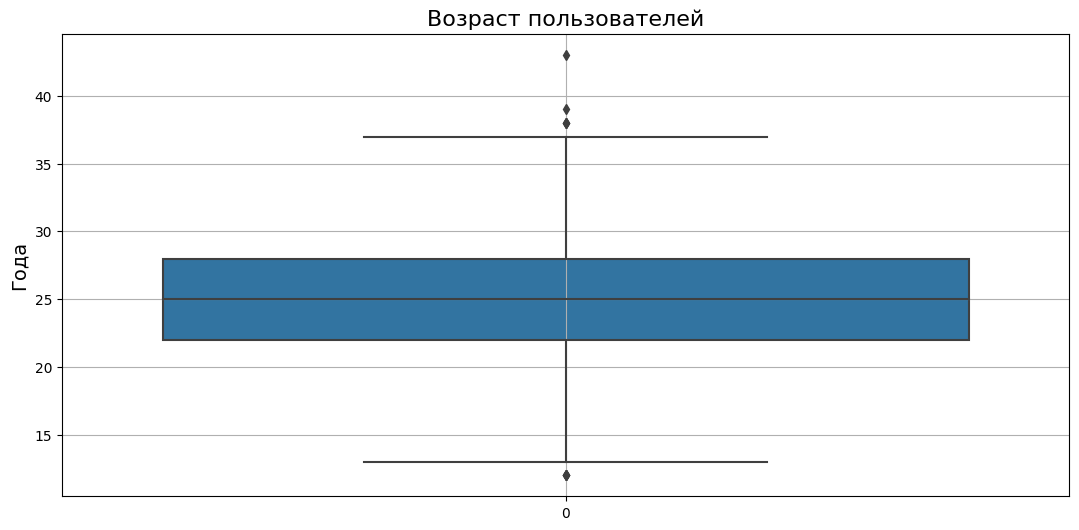

In [79]:
sns.boxplot(data_users['age'])

plt.title('Возраст пользователей', fontsize=16)
plt.ylabel('Года', fontsize=14)
plt.grid(True)

plt.show()

In [17]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Имеются предполагаемые аномальные значения до 13 лет и после 37, рассмотрим их подробнее:

In [18]:
data_users.query('age <= 13 or age >= 37').sort_values(by='age')

,user_id,name,age,city,subscription_type
34,35,Руслан,12,Пятигорск,ultra
727,728,Вячеслав,12,Пятигорск,free
664,665,Герман,12,Сочи,ultra
66,67,Анастасия,12,Ростов-на-Дону,ultra
235,236,Владимир,13,Тюмень,ultra
314,315,Игорь,13,Москва,ultra
553,554,Евгений,13,Тюмень,ultra
1249,1250,Георгий,13,Краснодар,free
779,780,Семен,13,Тюмень,free
1241,1242,Майя,13,Омск,free


**Вывод:** Оставим без изменений.

Рассмотрим `data_rides['duration']`:

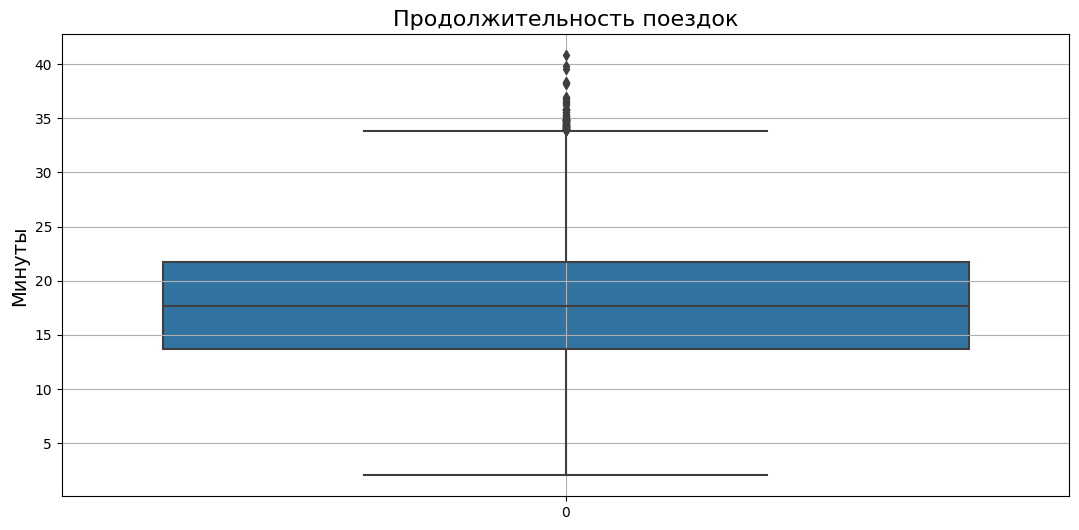

In [80]:
sns.boxplot(data_rides['duration'])

plt.title('Продолжительность поездок', fontsize=16)
plt.ylabel('Минуты', fontsize=14)
plt.grid(True)

plt.show()

In [20]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Имеются предполагаемые аномальные значения до 2 минут и после 34 минут, рассмотрим их подробнее:

In [21]:
data_rides.query('duration < 2 or duration > 34').sort_values(by='duration')

,user_id,distance,duration,date
9698,937,4169.066800,0.500000,2021-12-12
9135,896,5466.265687,0.500000,2021-10-13
9077,893,4762.120493,0.500000,2021-03-18
9049,890,4848.485014,0.500000,2021-11-20
13608,1217,5905.524822,0.500000,2021-09-27
...,...,...,...,...
6453,694,4210.871467,38.265229,2021-03-11
1998,216,4831.339954,38.352763,2021-05-11
2623,278,4754.433686,39.526602,2021-12-02
4709,507,4645.642671,39.873856,2021-01-15


Имеются странные значения с продолжительностью в 30 секунд, рассмотрим подробнее:

In [22]:
data_rides.query('duration < 2').sort_values(by='duration')

,user_id,distance,duration,date
6531,701,4196.445201,0.5,2021-08-31
14615,1287,5944.789947,0.5,2021-12-09
14574,1285,6316.574814,0.5,2021-09-25
14417,1273,4178.876258,0.5,2021-04-30
14342,1268,4177.139336,0.5,2021-06-09
...,...,...,...,...
9581,928,4857.412920,0.5,2021-06-06
9497,922,4620.899239,0.5,2021-01-05
9282,907,4520.123807,0.5,2021-04-24
10426,987,5375.139265,0.5,2021-03-16


In [23]:
data_rides.query('duration < 2').sort_values(by='distance')

,user_id,distance,duration,date
15132,1325,4030.308008,0.5,2021-12-22
17909,1524,4103.998874,0.5,2021-06-18
10692,1006,4106.278268,0.5,2021-10-31
9698,937,4169.066800,0.5,2021-12-12
14342,1268,4177.139336,0.5,2021-06-09
...,...,...,...,...
14574,1285,6316.574814,0.5,2021-09-25
13701,1224,6414.516026,0.5,2021-07-15
11385,1057,6601.197575,0.5,2021-02-07
17242,1477,6724.932981,0.5,2021-01-12


Все 95 значений продолжительностью в 30 секунд и с расстоянием от 4030 метров до 7212 метров, что является нереальным за такой промежуток времени. Удалим эти аномалии:

In [24]:
data_rides = data_rides.drop(index=data_rides.index[data_rides['duration'] < 2], axis=0).reset_index(drop=True)

Теперь рассмотрим отдельно значения больше 34 минут:

In [25]:
data_rides.query('duration > 34').sort_values(by='duration')

,user_id,distance,duration,date
1004,107,4217.033021,34.001998,2021-04-13
7437,767,3850.899177,34.004905,2021-09-15
17144,1476,4217.871874,34.006574,2021-04-13
13821,1237,3672.447904,34.031534,2021-01-25
8722,868,5211.731633,34.058658,2021-09-12
...,...,...,...,...
6453,694,4210.871467,38.265229,2021-03-11
1998,216,4831.339954,38.352763,2021-05-11
2623,278,4754.433686,39.526602,2021-12-02
4709,507,4645.642671,39.873856,2021-01-15


In [26]:
data_rides.query('duration > 34').sort_values(by='distance')

,user_id,distance,duration,date
13821,1237,3672.447904,34.031534,2021-01-25
17590,1509,3728.895778,34.339432,2021-01-22
5065,545,3766.439469,34.598637,2021-05-28
1621,174,3794.401307,35.766408,2021-12-23
17260,1485,3807.409685,34.767689,2021-12-09
...,...,...,...,...
10702,1010,5234.877441,34.174387,2021-07-01
10327,983,5520.883686,34.083535,2021-04-22
10567,1000,5577.793042,34.888965,2021-02-25
12671,1156,5720.331125,34.201806,2021-01-26


Средняя скорость электросамоката составляет 15-20 км/ч. Возьмем самый продолжительный заезд по времени (id 4215) и самый продолжительный заезд по расстоянию (id 8506) и проверим их средную скорость по формуле:

In [27]:
def average_speed(s, t):
    v = (s / 1000) / (t / 60)
    print('Средняя скорость {:.2f} км/ч'.format(v))

In [28]:
average_speed(data_rides.loc[4215, 'distance'], data_rides.loc[4215, 'duration'])

Средняя скорость 7.55 км/ч


In [29]:
average_speed(data_rides.loc[8506, 'distance'], data_rides.loc[8506, 'duration'])

Средняя скорость 11.11 км/ч


Средняя скорость не указывает на какие-либо аномалии в данных поездках. Оставим без изменений.

**Вывод:** Удалили аномальные значения с низкой продолжительностью и аномально высоким расстоянием.

Рассмотрим `data_rides['distance']`:

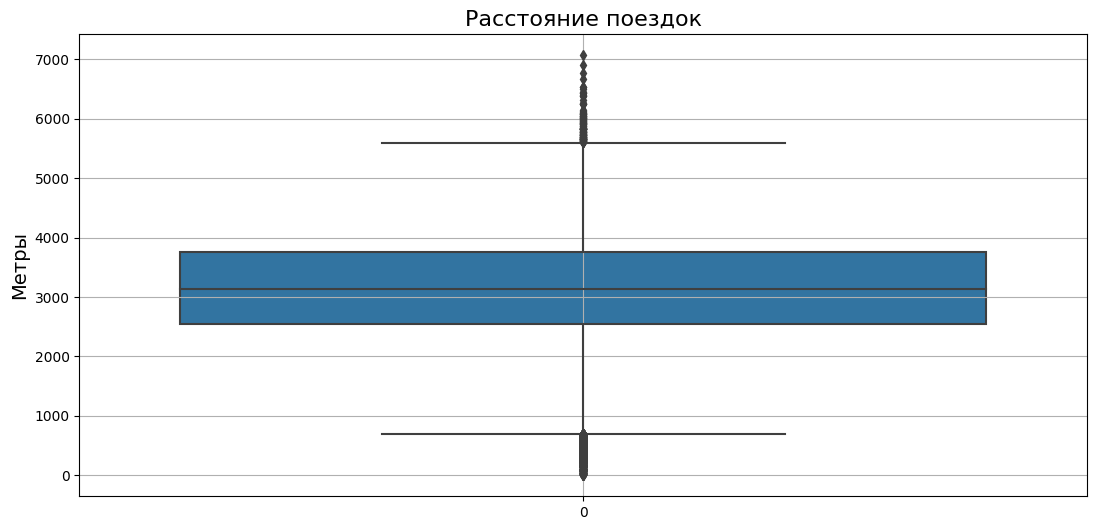

In [81]:
sns.boxplot(data_rides['distance'])

plt.title('Расстояние поездок', fontsize=16)
plt.ylabel('Метры', fontsize=14)
plt.grid(True)

plt.show()

In [31]:
data_rides['distance'].describe()

count    17973.000000
mean      3059.863833
std       1108.814612
min          0.855683
25%       2538.839628
50%       3129.029255
75%       3762.636244
max       7066.003772
Name: distance, dtype: float64

Имеются предполагаемые аномальные значения до 800 метров и после 5600, рассмотрим их подробнее:

In [32]:
data_rides.query('distance < 800 or distance > 5600').sort_values(by='distance').head(20)

,user_id,distance,duration,date
11508,1069,0.855683,10.001902,2021-01-31
9514,925,2.570787,3.011018,2021-10-19
13630,1223,4.329506,4.008958,2021-05-22
8637,861,6.784447,6.015656,2021-07-21
7824,796,7.097072,10.026614,2021-11-26
8885,880,11.283615,2.035632,2021-03-28
8305,835,12.233115,4.034952,2021-09-19
13878,1240,15.000606,10.045002,2021-08-20
15550,1364,15.366168,6.057623,2021-08-22
11812,1091,15.630873,13.044660,2021-03-29


In [33]:
data_rides.query('distance < 800 or distance > 5600').sort_values(by='distance').tail(20)

,user_id,distance,duration,date
17728,1517,6131.833778,24.395501,2021-12-17
9764,944,6143.357904,20.164338,2021-06-29
10526,997,6239.565160,30.016996,2021-05-16
9726,941,6251.393925,26.754182,2021-11-06
9262,907,6251.726079,19.862075,2021-07-26
16592,1434,6258.822183,28.035289,2021-05-24
16196,1409,6306.531557,24.199632,2021-02-19
10625,1004,6383.036257,27.149109,2021-07-13
7035,737,6386.938020,25.967345,2021-07-31
7621,782,6395.396068,28.982735,2021-02-22


Проверим среднюю скорость (id 16399) самого продолжительного заезда по расстоянию:

In [34]:
average_speed(data_rides.loc[16399, 'distance'], data_rides.loc[16399, 'duration'])

Средняя скорость 17.95 км/ч


**Вывод:** Оставим без изменений.

Изменим тип столбца `date`:

In [35]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

Проверим за какой год у нас представлены поездки:

In [36]:
data_rides['date'].dt.year.unique()

array([2021])

Поездки представлены только за 2021 год.

Добавим столбец `month` с номером месяца:

In [37]:
data_rides['month'] = data_rides['date'].dt.month

In [38]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Вывод:** удалили явные дубликаты в `data_users`, аномалии в `data_rides`. Пропуски значений не обнаружены. Заменили тип столбца `date` в `data_rides`. Добавили столбец с месяцами.

#### Шаг 3. Исследовательский анализ данных

Выведем частоту встречаемости городов:

In [39]:
city_count = data_users.pivot_table(index='city', values='name', aggfunc=['count']).reset_index()
city_count.columns = ['city', 'count']
city_count = city_count.sort_values(by='count').reset_index(drop=True)
city_count

,city,count
0,Москва,168
1,Тюмень,180
2,Омск,183
3,Сочи,189
4,Краснодар,193
5,Ростов-на-Дону,198
6,Екатеринбург,204
7,Пятигорск,219


И в виде графика. Для подписи значений используем отдельную функцию:

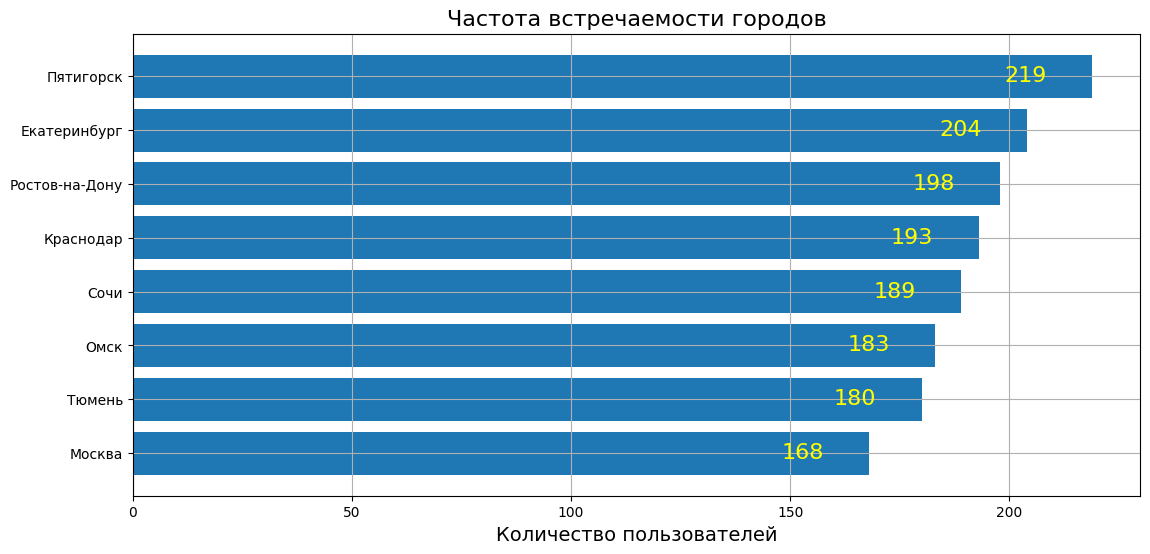

In [40]:
def addlabels(x, y):
    for i in range(len(y)):
        plt.text(y[i] - 20,i - 0.1,y[i], fontsize=16, c='yellow')

plt.barh(city_count['city'], city_count['count'])
addlabels(city_count['city'], city_count['count'])

plt.title('Частота встречаемости городов', fontsize=16)
plt.xlabel('Количество пользователей', fontsize=14)
plt.grid(True)

plt.show()

Посмотрим соотношение пользователей с подпиской и без подписки:

In [41]:
sub_count = data_users.pivot_table(index='subscription_type', values='name', aggfunc=['count']).reset_index()
sub_count.columns = ['subscription_type', 'count']
sub_count = sub_count.sort_values(by='count').reset_index(drop=True)
sub_count

,subscription_type,count
0,ultra,699
1,free,835


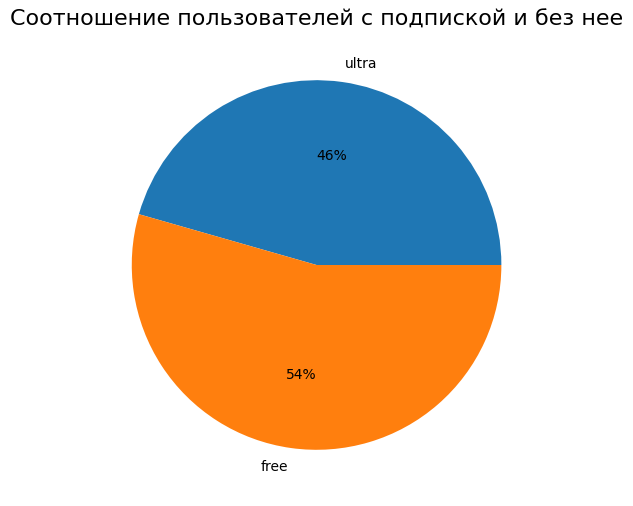

In [42]:
plt.pie(sub_count['count'], labels=sub_count['subscription_type'], autopct='%1.0f%%')
plt.title('Соотношение пользователей с подпиской и без нее', fontsize=16)

plt.show()

Соотношение пользователей без подписки и пользователей с подпиской составляет 54% и 46%.

Возраст пользователей:

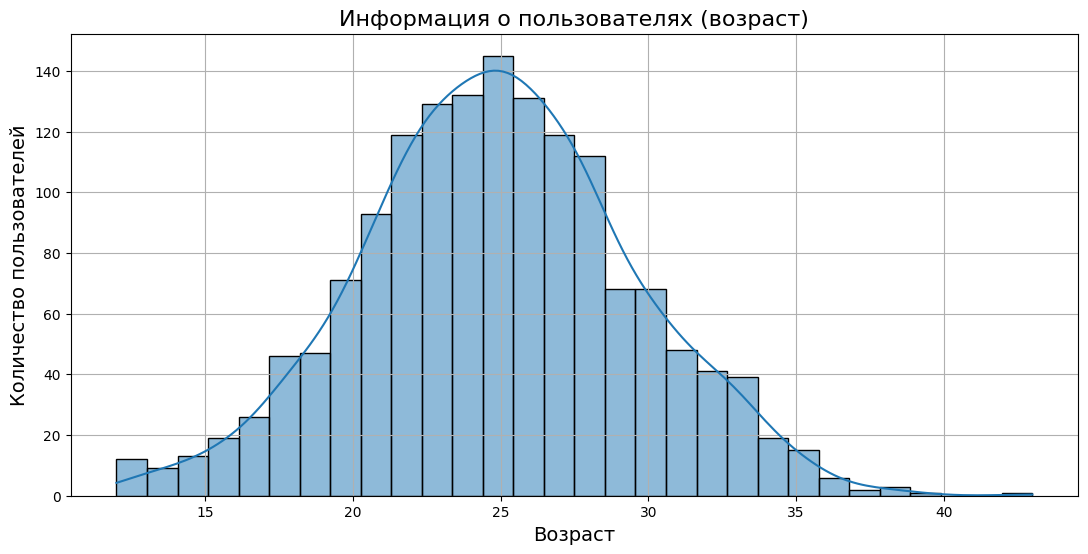

In [43]:
sns.histplot(data=data_users, x='age', kde=True, bins=30)

plt.title('Информация о пользователях (возраст)', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(True)

plt.show()

In [44]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Средний возраст пользователя 25 лет. Минимальный - 12 лет, максимальный - 43 года.

Продолжительность поездок:

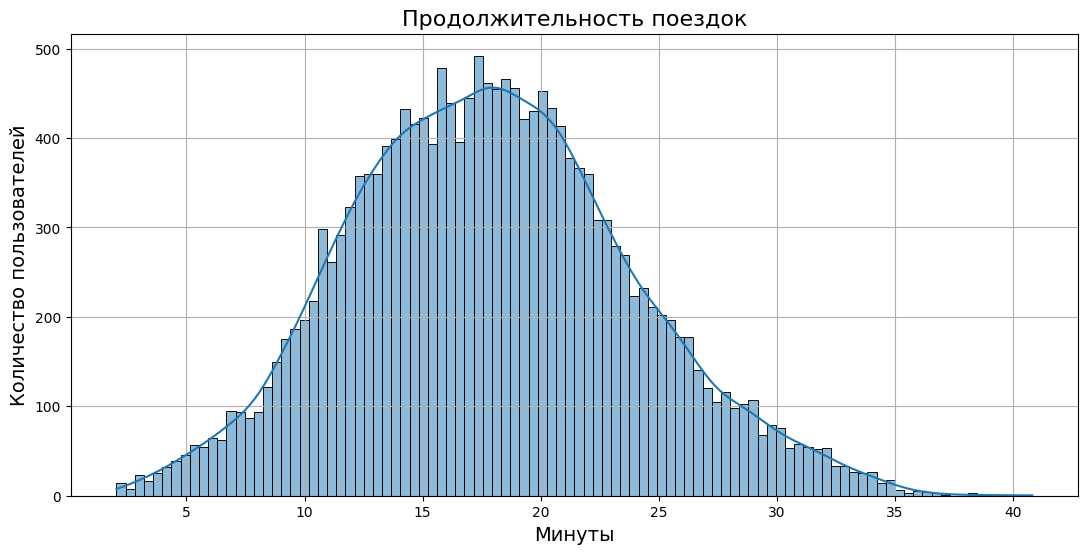

In [45]:
sns.histplot(data=data_rides, x='duration', kde=True, bins=100)

plt.title('Продолжительность поездок', fontsize=16)
plt.xlabel('Минуты', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(True)

plt.show()

In [46]:
data_rides['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

Медаина составляет 18 минут, 1-й квартиль - 14 минут, 3-й - 22 минуты, стандартное отклонение 6 минут. Распределение нормальное.

Расстояние, которое пользователь преодолел за одну поездку:

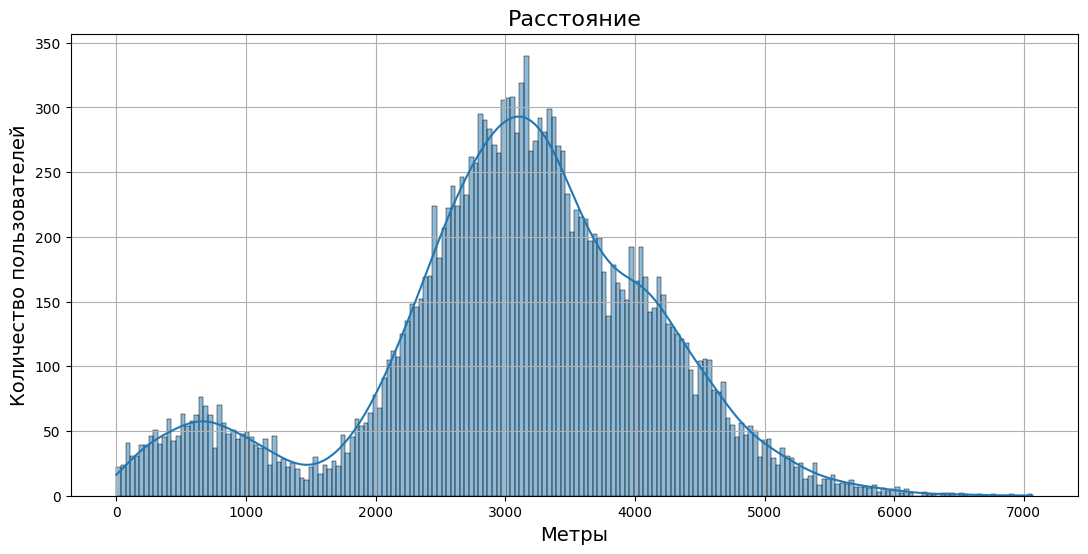

In [47]:
sns.histplot(data=data_rides, x='distance', kde=True, bins=200)

plt.title('Расстояние', fontsize=16)
plt.xlabel('Метры', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(True)

plt.show()

На графике видно 2 вершины, скорее всего это связано с тем, что есть активные пользователи, которые катаются долго, и пользователи, которые решили попробовать прокатиться на электросамокате (малая вершина).

In [48]:
data_rides['distance'].describe()

count    17973.000000
mean      3059.863833
std       1108.814612
min          0.855683
25%       2538.839628
50%       3129.029255
75%       3762.636244
max       7066.003772
Name: distance, dtype: float64

Медиана - 3129 метров, 1-й квартиль - 2539 метров, 3-й - 3763 метра, стандартное отклонение 1109 метров. 

**Вывод:** Рассмотрели:
- частоту встречаемости городов: больше всего встречается Пятигорск (219 раз), меньше всего Москва (168 раз);
- соотношение пользователей: пользователей с подпиской представлено 46%, без нее - 54%;
- возраст пользователей: средний возраст - 25 лет, минимальный - 12 лет, максимальный - 43 года;
- продолжительность поездок: медиана составляет 18 минут, 1-й квартиль - 14 минут, 3-й - 22 минуты, стандартное отклонение 6 минут;
- расстояние, которое пользователь преодолел за одну поездку: медиана - 3129 метров, 1-й квартиль - 2539 метров, 3-й - 3763 метра, стандартное отклонение 1109 метров.

#### Шаг 4. Объединение данных

Объединим базы данных:

In [49]:
data = data_users.merge(data_rides, on='user_id')

In [50]:
data = data.merge(data_subscriptions, on='subscription_type')

Выведем первые 5 строк:

In [51]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Проверим не потеряли ли строки при объединении:

In [52]:
data_rides.shape[0] - data.shape[0]

0

Округлим минуты в большую сторону:

In [53]:
data['duration'] = np.ceil(data['duration'])

Создадим 2 датафрейма с пользователями с подпиской и без нее:

In [54]:
data_sub_on = data.query('subscription_type == "ultra"')

In [55]:
data_sub_off = data.query('subscription_type == "free"')

Расстояние, которое пользователь преодолел за одну поездку с разбивкой по наличию подписки:

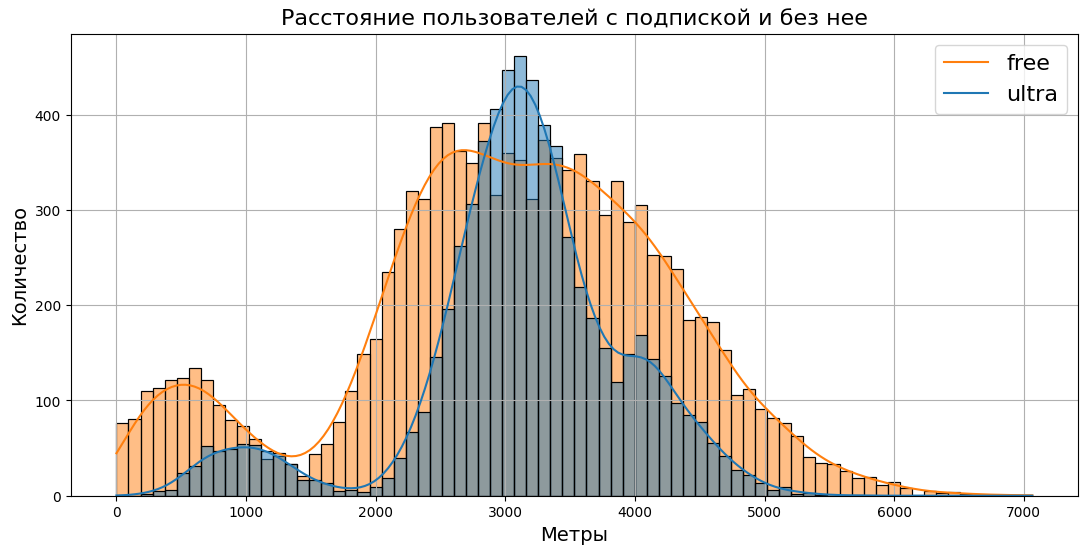

In [56]:
sns.histplot(data=data, x="distance", kde=True, hue='subscription_type')

plt.legend(['free', 'ultra'], prop={'size': 16})
plt.title('Расстояние пользователей с подпиской и без нее', fontsize=16)
plt.xlabel('Метры', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.grid(True)

plt.show()

In [57]:
data_sub_on['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Медиана расстояния для пользователя с подпиской составляет 3149 метров, 1-й квартиль - 2785 метров, 3-й - 3561 метр, стандартное отклонение 837 метров.

In [58]:
data_sub_off['distance'].describe()

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

Медиана расстояния для пользователя без подписки составляет 3102 метра, 1-й квартиль - 2361 метр, 3-й - 3884 метра, стандартное отклонение 1236 метров.

**Вывод:** Стандартное отклонение по пройденому расстоянию между пользователями с подпиской и без нее отличется почти в 1.5 раза.

Продолжительность поездок для пользователя с подпиской и без нее:

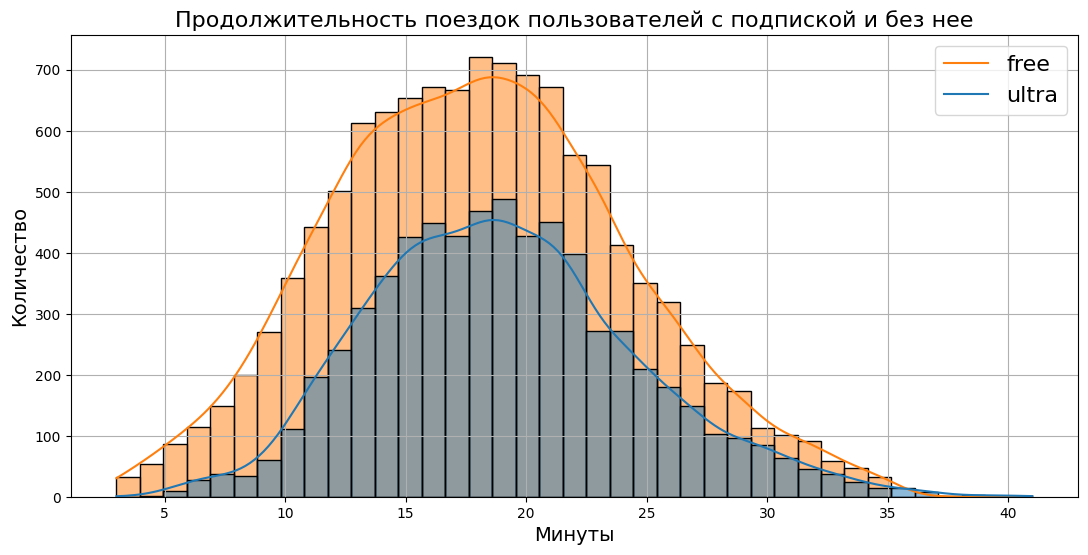

In [59]:
sns.histplot(data=data, x="duration", kde=True, hue='subscription_type', bins=39)

plt.legend(['free', 'ultra'], prop={'size': 16})
plt.title('Продолжительность поездок пользователей с подпиской и без нее', fontsize=16)
plt.xlabel('Минуты', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.grid(True)

plt.show()

In [60]:
data_sub_on['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Медиана для пользователей с подпиской составляет 19 минут, 1-й квартиль - 15 минут, 3-й квартиль - 22, стандартное отклонение 5.6 минуты.

In [61]:
data_sub_off['duration'].describe()

count    11473.000000
mean        18.030855
std          6.166175
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

Медиана для пользователей без подписки составляет 18 минут, 1-й квартиль - 14 минут, 3-й квартиль - 22, стандартное отклонение 6.2 минуты.

**Вывод:** распределение графиков по времени можно назвать идентичным. Различается только количество записей, как указывали раньше почти в 1.5 раза.

Также построим графики распределения:

C:\Users\kiril\practicum\practicum_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


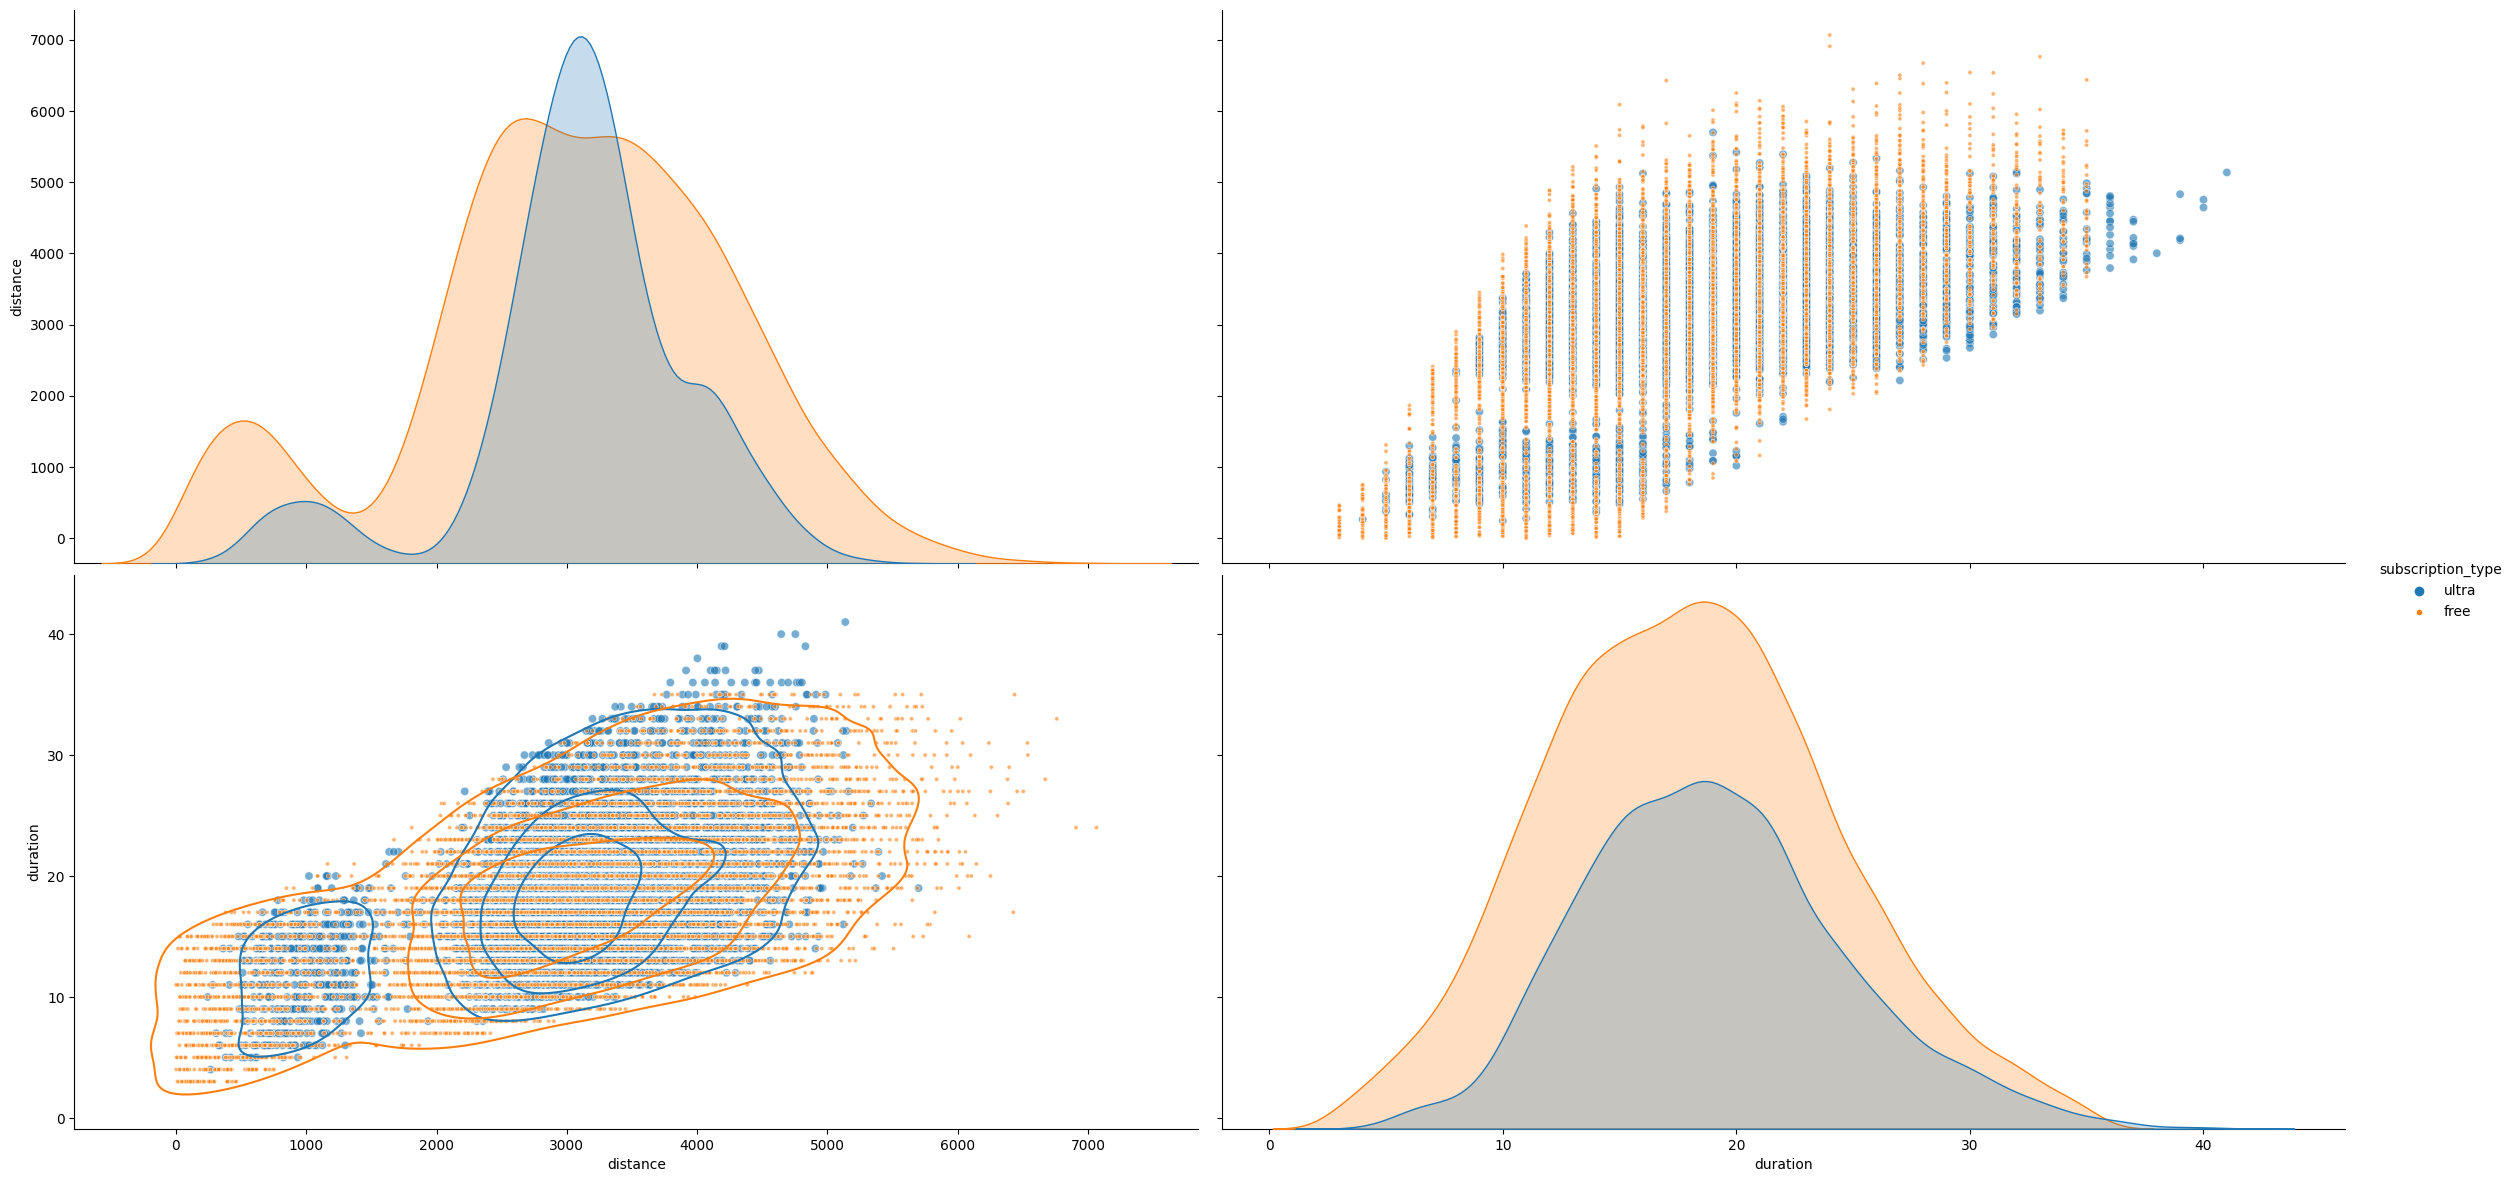

In [82]:
pplot = sns.pairplot(data, x_vars=['distance', 'duration'], y_vars=['distance', 'duration'], hue='subscription_type', plot_kws={'alpha': 0.6}, markers=["o", "."], height=6, aspect=2);
pplot.map_lower(sns.kdeplot, levels=4, color='.2')

plt.show()

Стоит обратить внимание, что количество записей с подпиской и без составляет 36% и 64% соответственно. Ранее мы выяснили, что соотношение уникальных пользователей с подпиской и без нее составляет 46% и 54% соответственно, т.е. пользователи без подписки чаще пользуются услугами сервиса, чем пользователи с подпиской.

Создали 2 отдельных датафрема с пользователями с подпиской и без нее. Рассмотрели:
- расстояние, которое пользователь преодолел за одну поездку с разбивкой по наличию подписки: стандартное отклонение у пользователей без подписки выше почти в 1.5 раза. Можно выделить 2 диапазона по пройденному расстоянию:
    -  для пользователей с подпиской:
        -   от 500 до 1500 метров;
        -   от 2000 до 5000 метров;
    -  для пользователей без подписки:
        -   от 0 до 1000 метров;
        -   от 1500 до 5500 метров.
  
  На мой взгляд подобные диапазоны обусловлены опытностью пользователей в управлении электросамокатом и стоимостью услуги. 
  
  
- продолжительность поездок для пользователя с разбивкой по наличию подписки: распределение графиков по времени можно назвать идентичным. Медиана продолжительности для пользователей с подпиской и без 19 и 18 минут соответственно, стандартное отклонение около 6 минут и чуть более 6 минут соответственно.

#### Шаг 5. Подсчёт выручки

Создадим отдельные датафреймы с агрегированными данными о поездках (суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц):

In [63]:
data_revenue = data.groupby(['user_id', 'month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'])\
.agg({'distance':['sum', 'count'], 'duration':['sum']}).reset_index()
data_revenue.head(10)

user_id month subscription_type minute_price start_ride_price  \
                                                                  
0       1     1             ultra            6                0   
1       1     4             ultra            6                0   
2       1     8             ultra            6                0   
3       1    10             ultra            6                0   
4       1    11             ultra            6                0   
5       1    12             ultra            6                0   
6       2     3             ultra            6                0   
7       2     4             ultra            6                0   
8       2     6             ultra            6                0   
9       2     7             ultra            6                0   

  subscription_fee      distance       duration  
                             sum count      sum  
0              199   7027.511294     2     42.0  
1              199    754.159807     1      7.0  
2              199   6723.470560     2     46.0  
3              199   5809.911100     2     32.0  
4              199   7003.499363     3     56.0  
5              199   6751.629942     2     28.0  
6              199  10187.723006     3     63.0  
7              199   6164.381824     2     40.0  
8              199   3255.338202     1     14.0  
9              199   6780.722964     2     48.0

Поменяем названия столбцов и поменяем тип данных у столбца с суммарным временем:

In [64]:
data_revenue.columns = ['user_id', 'month', 'subscription_type', 'minute_price', 
                        'start_ride_price', 'subscription_fee', 'distance_sum', 'count', 'duration_sum']
data_revenue['duration_sum'] = data_revenue['duration_sum'].astype(int)
data_revenue.head(10)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance_sum,count,duration_sum
0,1,1,ultra,6,0,199,7027.511294,2,42
1,1,4,ultra,6,0,199,754.159807,1,7
2,1,8,ultra,6,0,199,6723.470560,2,46
3,1,10,ultra,6,0,199,5809.911100,2,32
4,1,11,ultra,6,0,199,7003.499363,3,56
5,1,12,ultra,6,0,199,6751.629942,2,28
6,2,3,ultra,6,0,199,10187.723006,3,63
7,2,4,ultra,6,0,199,6164.381824,2,40
8,2,6,ultra,6,0,199,3255.338202,1,14
9,2,7,ultra,6,0,199,6780.722964,2,48


Создадим функцию, чтобы посчитать сколько в среднем тратит каждый пользователь в месяц и добавим эти данные отдельным столбцом:

In [65]:
def revenue_count(row):
    try:
        result = ((row['start_ride_price'] * row['count']) + row['minute_price'] * 
                  row['duration_sum'] + row['subscription_fee'])
        return result
    except:
        pass

Добавим новый столбец с помесячной выручкой:

In [66]:
data_revenue['income_per_month'] = data_revenue.apply(revenue_count, axis=1)

In [67]:
data_revenue.head(10)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance_sum,count,duration_sum,income_per_month
0,1,1,ultra,6,0,199,7027.511294,2,42,451
1,1,4,ultra,6,0,199,754.159807,1,7,241
2,1,8,ultra,6,0,199,6723.470560,2,46,475
3,1,10,ultra,6,0,199,5809.911100,2,32,391
4,1,11,ultra,6,0,199,7003.499363,3,56,535
5,1,12,ultra,6,0,199,6751.629942,2,28,367
6,2,3,ultra,6,0,199,10187.723006,3,63,577
7,2,4,ultra,6,0,199,6164.381824,2,40,439
8,2,6,ultra,6,0,199,3255.338202,1,14,283
9,2,7,ultra,6,0,199,6780.722964,2,48,487


Создали отдельный датафрейм с доходом от каждого пользователя сервисом помесячно. Единственный вопрос, на который нет ответа - условия списания абонентской платы. Списывается она ежемесячно независимо использовал ты сервис или нет или она списывается единожды в месяц, когда пользователь воспользовался сервисом. 

При подсчетах исходил из 2-го варианта.

#### Шаг 6. Проверка гипотез

Проверим ряд гипотез:

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Выдвигаем нулевую гипотезу: "Пользователи с подпиской и без тратят одинаковое количество времени на поездки".

Альтернативная гипотеза: "Пользователи с подпиской тратят больше времени на поездки".

Ставним 2 датасета созданных ранее (1 - пользователи с подпиской, 2 - пользователи без подписки). Уровень статистической значимости ставим 5%:

In [68]:
alpha = 0.05
results = st.ttest_ind(data_sub_on['duration'], data_sub_off['duration'], equal_var = False, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Есть достаточно оснований, чтобы отклонить нулевую гипотезу, принимаем альтернативную гипотезу.')
else:
    print('Нет достаточно оснований, чтобы отклонить нулевую гипотезу.') 

p-значение: 3.086332092684639e-29
Есть достаточно оснований, чтобы отклонить нулевую гипотезу, принимаем альтернативную гипотезу.


Выведем среднее время в минутах для пользователей с подпиской и без:

In [69]:
print('Пользователь с подпиской в среднем тратит {} минут на поездку.'
      .format(int(round(data_sub_on['duration'].agg('mean')))))

Пользователь с подпиской в среднем тратит 19 минут на поездку.


In [70]:
print('Пользователь без подписки в среднем тратит {} минут на поездку.'
      .format(int(round(data_sub_off['duration'].agg('mean')))))

Пользователь без подписки в среднем тратит 18 минут на поездку.


**Вывод:** пользователи с подпиской тратят больше времени на поездки.

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**

Выдвигаем нулевую гипотезу: "Расстояние, которое проезжают пользователи с подпиской за одну поездку, равняется 3130 метрам".

Альтернативная гипотеза: "Расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров".

Уровень статистической значимости ставим 5%:

In [71]:
optimal_distance = 3130
alpha = 0.05
results = st.ttest_1samp(data_sub_on['distance'], optimal_distance, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Есть достаточно оснований, чтобы отклонить нулевую гипотезу, принимаем альтернативную гипотезу.')
else:
    print('Нет достаточно оснований, чтобы отклонить нулевую гипотезу.') 

p-значение: 0.9195368847849785
Нет достаточно оснований, чтобы отклонить нулевую гипотезу.


**Вывод:** расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

**6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

Ранее мы посчитали, какой доход приносит каждый пользователь ежемесячно. На основе этого датафрейма создадим 2 таблицы, в одной будут все пользователи с подпиской, во второй - без нее.

In [72]:
ipm_on = data_revenue[data_revenue['subscription_type'] == 'ultra']
ipm_off = data_revenue[data_revenue['subscription_type'] == 'free']

Теперь проверим гипотезу.

Выдвигаем нулевую гипотезу: "Помесячная выручка от пользователей с подпиской и от пользователей без подписки однаковая".

Альтернативная гипотеза: "Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки".

Уровень статистической значимости ставим 5%:

In [73]:
alpha = 0.05
results = st.ttest_ind(ipm_on['income_per_month'], ipm_off['income_per_month'], 
                       equal_var = False, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Есть достаточно оснований, чтобы отклонить нулевую гипотезу, принимаем альтернативную гипотезу.')
else:
    print('Нет достаточно оснований, чтобы отклонить нулевую гипотезу.') 

p-значение: 2.4970242872858465e-38
Есть достаточно оснований, чтобы отклонить нулевую гипотезу, принимаем альтернативную гипотезу.


**Вывод:** Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Для проверки данной гипотезы нам необходимо использовать метод `st.ttest_rel(before, after)`. Он проверяет гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок.

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Используем биноминальное распределение с вероятностью 0.1:

Необходимое количество промокодов 1172, чтобы вероятность не выполнить план была примерно 5%
При раздаче 1172 промокодов вероятность не выполнить план равна 4.95%


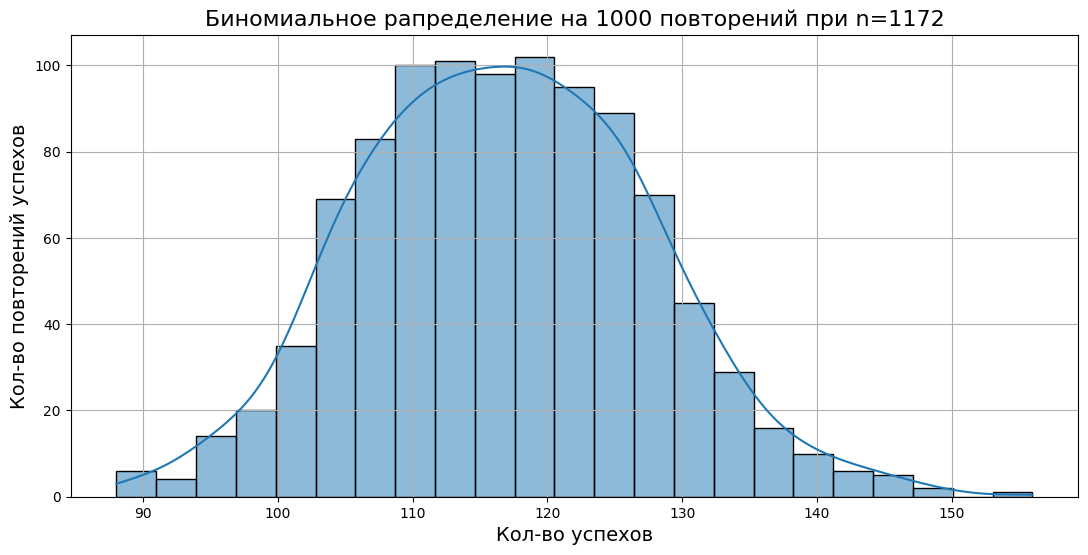

In [74]:
n = 99 # возьмем стартовое значение промокодов за 99
p = 0.1 # вероятность продления беплатной подписки
y = 0.05 # вероятность не выполнить план
z = st.binom.cdf(k=100, n=n, p=p) # находим левый хвост

while z >= y: # создадим цикл с условием добавления кол-ва промокодов, пока шанс не выполнить план больше y
    n += 1
    z = st.binom.cdf(k=100, n=n, p=p)

print('Необходимое количество промокодов {}, чтобы вероятность не выполнить план была примерно 5%'.format(n))
print('При раздаче {} промокодов вероятность не выполнить план равна {:0.2%}'.format(n, z))

x = np.random.binomial(n=n , p=p , size=1000) # для визуализации проведем 1000 экспериментов

sns.histplot(x, kde=True) # выведем график
plt.title('Биномиальное рапределение на 1000 повторений при n={}'.format(n), fontsize=16)
plt.xlabel('Кол-во успехов', fontsize=14)
plt.ylabel('Кол-во повторений успехов', fontsize=14)
plt.grid(True)

plt.show()

С помощью биноминального распределения выяснили, что нужно разослать 1173 промокода, чтобы вероятность не выполнить план была примерно 5 %.

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Построим примерный график распределения с помощью аппроксимации:

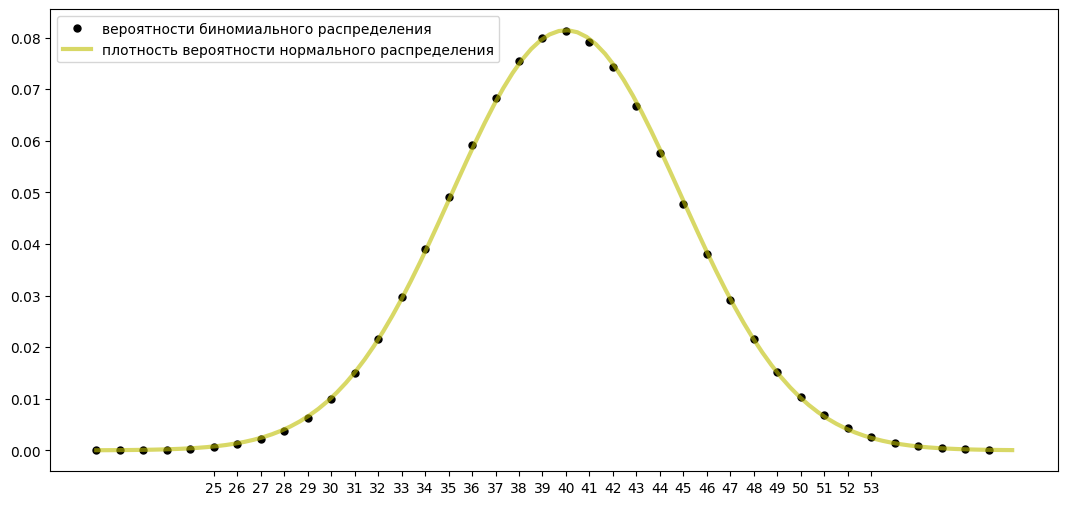

Условие аппроксимации выполняется


In [75]:
# для визуализации зададим функцию, которая выдаёт <num> чисел, равномерно распределённых от <start> до <stop>
def linspace(start, stop, num): 
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
n = 100 # для наглядности число уведомлений уменьшено в 10000 раз
p = 0.4

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке: все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
ax = plt.subplot()
ax.plot(x, st.binom.pmf(x, n, p), 'ko', ms=5, label='вероятности биномиального распределения')

mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения: получим список из 100 чисел от left до right
x = linspace(left, right, 100)
ax.plot(x, st.norm.pdf(x, mu, sigma), 'y-', lw=3, alpha=0.6, label='плотность вероятности нормального распределения')
 
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации: лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие аппроксимации выполняется')
else:
    print('Условие аппроксимации не выполняется')

Теперь оценим вероятность:

In [76]:
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399500
result = distr.cdf(399500)
print('Вероятность, что уведомление откроют не более 399,5 тыс. пользователей составляет {:.2%}'.format(result))

Вероятность, что уведомление откроют не более 399,5 тыс. пользователей составляет 15.37%


# Общий вывод

**В представленных датафреймах пропусков не обнаружено. В рамках преодбработки провели следующее:**
- удалили явные дубликаты в `data_users`;
- удалили аномальные значения в столбце `duration` датафрейма `data_rides`;
- изменили тип столбца `date` в датафрейме `data_rides`;
- добавили дополнительный столбец `month`.

**В рамках исследовательского анализа данных рассмотрели:**
- частоту встречаемости городов: больше всего встречается *Пятигорск* (219 раз), меньше всего *Москва* (168 раз);
- соотношение пользователей: пользователей с подпиской представлено *46%*, без нее - *54%*;
- возраст пользователей: средний возраст - *25 лет*, минимальный - *12 лет*, максимальный - *43 года*;
- продолжительность поездок: медиана составляет *18 минут*, 1-й квартиль - *14 минут*, 3-й - *22 минуты*, стандартное отклонение *6 минут*;
- расстояние, которое пользователь преодолел за одну поездку: медиана - 3129 метров, 1-й квартиль - 2539 метров, 3-й - 3763 метра, стандартное отклонение 1109 метров.

Далее объединили все датафреймы в один. Для дальнейшего подсчета прибыли округлили все минуты в столбце `duration` в большую сторону. На сонове общего датафрейма создали два отдельных с разбивкой на наличие подписки.

*Стоит обратить внимание, что количество записей с подпиской и без составляет 36% и 64% соответственно. Ранее мы выяснили, что соотношение уникальных пользователей с подпиской и без нее составляет 46% и 54% соответственно, т.е. пользователи без подписки чаще пользуются услугами сервиса, чем пользователи с подпиской.*

**Отдельно рассмотрели:**
- расстояние, которое пользователь преодолел за одну поездку с разбивкой по наличию подписки: 
    - медиана расстояния для пользователя с подпиской составляет 3149 метров, 1-й квартиль - 2785 метров, 3-й - 3561 метр, стандартное отклонение 837 метров;
    - медиана расстояния для пользователя без подписки составляет 3102 метра, 1-й квартиль - 2361 метр, 3-й - 3884 метра, стандартное отклонение 1236 метров.
  
  Стандартное отклонение у пользователей без подписки выше почти в 1.5 раза. Можно выделить 2 диапазона по пройденному расстоянию:
    -  для пользователей с подпиской:
        -   от 500 до 1500 метров;
        -   от 2000 до 5000 метров;
    -  для пользователей без подписки:
        -   от 0 до 1000 метров;
        -   от 1500 до 5500 метров.
  
  На мой взгляд подобные диапазоны обусловлены опытностью пользователей в управлении электросамокатом и стоимостью услуги. 
  
  
- продолжительность поездок для пользователя с разбивкой по наличию подписки: распределение графиков по времени можно назвать идентичным. Медиана продолжительности для пользователей с подпиской и без 19 и 18 минут соответственно, стандартное отклонение около 6 минут и чуть более 6 минут соответственно.

Создали отдельный датафрейм с доходом от каждого пользователя сервисом помесячно. Единственный вопрос, на который нет ответа - условия списания абонентской платы. Списывается она ежемесячно независимо использовал ты сервис или нет или она списывается единожды в месяц, когда пользователь воспользовался сервисом.

При подсчетах исходил из 2-го варианта.

**Проверили 3 гипотезы и получили следующие выводы:**
- Пользователи с подпиской тратят больше времени на поездки;
- Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Подобрали метод для рассмотрения 4й гипотезы.

В среднем пользователь с подпиской приносит на 9,4% больше прибыли в месяц.

**Проверили распределения:**
- для получения вероятности менее 5% 100 продлений пробного периода необходимо разослать не менее 1172 промокодов;
- вероятность, что уведомление откроют не более 399,5 тыс. пользователей составляет 15.37%.